In [56]:
import seaborn as sns
import json
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

## Load the annotations into a `DataFrame`

In [57]:
df = pd.read_json('../annotations.json')

## Distribution of relation labels

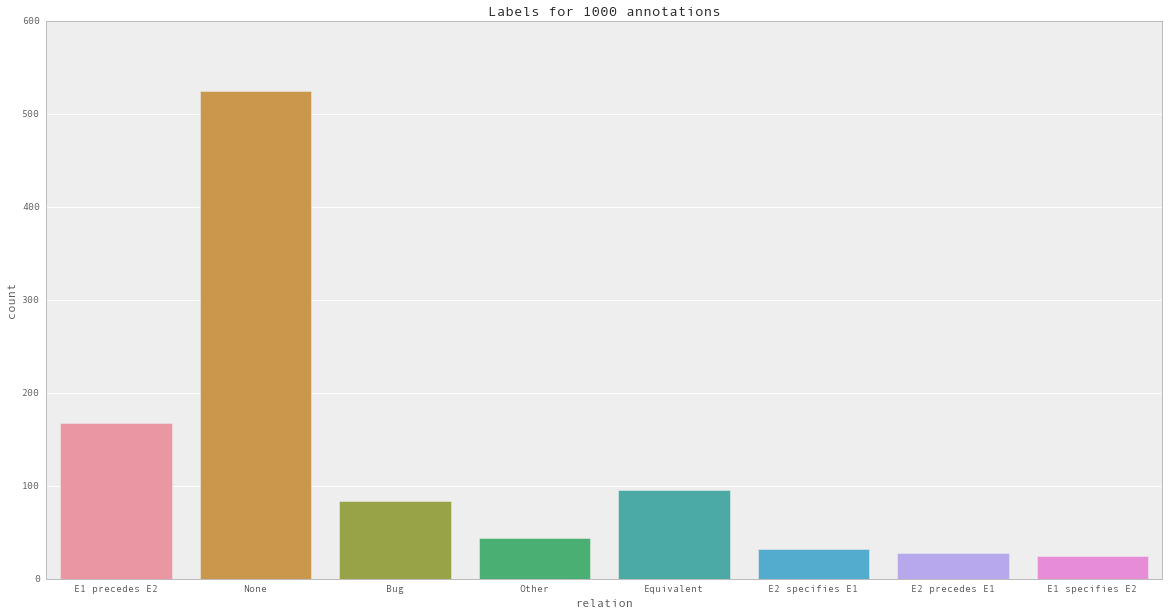

In [58]:
rel = "relation"
# only show the rows with a definitive annotation
non_empty = df[df[rel] != ""]
plt.figure(figsize=(20, 10))
sns.plt.title("Labels for {} annotations".format(len(non_empty)))
_ = sns.countplot(x="relation", data=non_empty)
#sns.plt.show()

## Distribution of relation labels (cont'd)

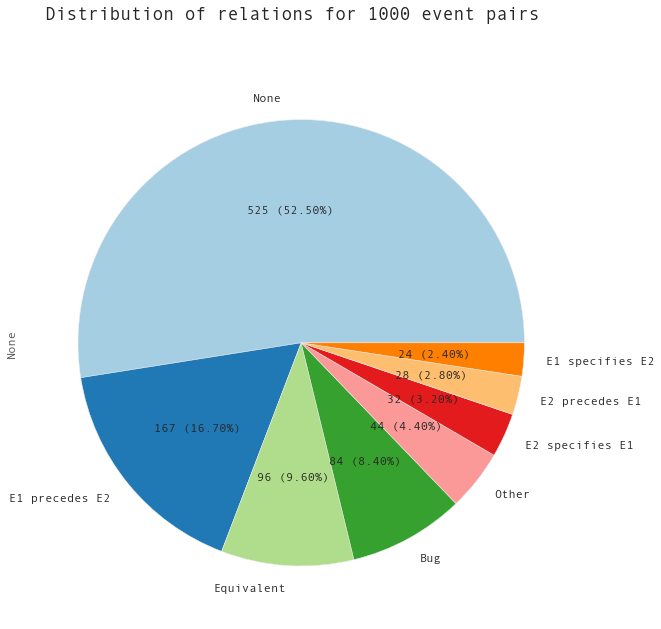

In [59]:
#relation_groups = non_empty.groupby(rel)
counts = non_empty[rel].value_counts()
lbls, cnts = list(zip(*counts.items()))
series = pd.Series(cnts, index=lbls)#, name='Relation counts')
#_ = pd.DataFrame(counts)
fig_title = "Distribution of relations for {} event pairs".format(len(non_empty))
ax = series.plot(
        kind='pie', 
        #labels=lbls, 
        fontsize=12,
        autopct=lambda p: '{:.0f} ({:.2f}%)'.format(round(p * counts.sum() / 100), p),
        colors=sns.color_palette("Paired", 8),
        #subplots=True, 
        figsize=(10, 10), 
#        title=fig_title,
)

fig = ax.get_figure()
fig.suptitle(fig_title, fontsize=18, fontweight="bold")
fig.savefig('relation-dist.png')

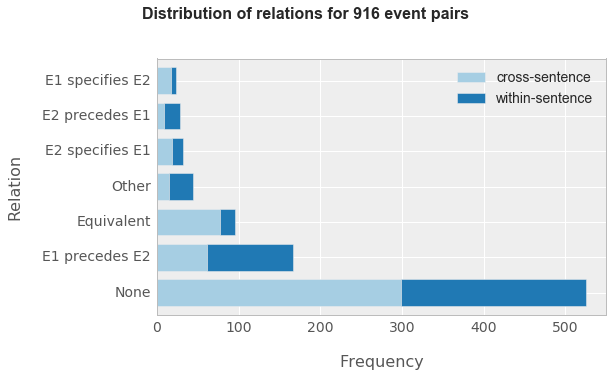

In [175]:
#pd.options.display.mpl_style='default'
df2 = pd.read_json('../annotations.json')
df2 = df2[df2.relation != "Bug"]
sentential_span = "Legend"
df2[sentential_span] = df2['cross-sentence'].replace({True: "cross-sentence", False: "within-sentence"})
# count relations for each category + within vs across
category_group = df2.groupby(['relation', sentential_span]).size()
#print(category_group.unstack().columns)
stacked_df = category_group.unstack()
# get total for sorting
stacked_df['total'] = stacked_df['cross-sentence'] + stacked_df['within-sentence']
ax = stacked_df.sort_values(['total'], ascending=[0])[['cross-sentence', 'within-sentence']].plot(
    kind='barh',
    fontsize=14,
    stacked=True,
    color=sns.color_palette("Paired", 2),
    legend=True,
    #subplots=True, 
    figsize=(10, 6),
    width=0.75
)

sns.plt.rc('font', family='sans-serif', serif='Times')
x0, x1 = sns.plt.xlim()
ax.set_xlim(x0, 550)
sns.plt.ylabel("Relation", fontsize=16, labelpad=20)
sns.plt.xlabel("Frequency", fontsize=16, labelpad=20)
sns.plt.legend(fontsize=14)
fig_title = "Distribution of relations for {} event pairs".format(len(df2))
sns.plt.suptitle(fig_title, fontsize=16, fontweight="bold")
sns.plt.tight_layout(pad=6)
sns.plt.savefig('relation-dist-bar.png')

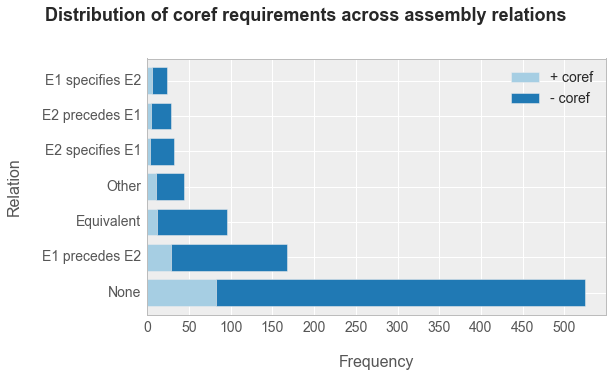

In [176]:
import numpy as np

df3 = pd.read_json('../annotations.json')
df3 = df3[df3.relation != "Bug"]
coref = "coref"
df3[coref] = df3[coref].replace({True: "+ coref", False: "- coref"})
# count relations for each category + coref
coref_group = df3.groupby(['relation', coref]).size()
stacked_coref_df = coref_group.unstack()
# get total for sorting
stacked_coref_df['total'] = stacked_coref_df['+ coref'] + stacked_coref_df['- coref']
ax = stacked_coref_df.sort_values(['total'], ascending=[0])[['+ coref', '- coref']].plot(
    kind='barh',
    fontsize=14,
    stacked=True,
    color=sns.color_palette("Paired", 2),
    legend=True,
    #subplots=True, 
    figsize=(10, 6),
    width=0.75
)

sns.plt.rc('font', family='sans-serif', serif='Times')
sns.plt.ylabel("Relation", fontsize=16, labelpad=20)
sns.plt.xlabel("Frequency", fontsize=16, labelpad=20)
ax.set_xticks(np.arange(0,550,50))
x0, x1 = sns.plt.xlim()
ax.set_xlim(x0, 550)
sns.plt.legend(fontsize=14)
fig_title = "Distribution of coref requirements across assembly relations".format(len(df2))
sns.plt.suptitle(fig_title, fontsize=18, fontweight="bold")
sns.plt.tight_layout(pad=6)
sns.plt.savefig('relation-coref-dist-bar.png')